In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.svm import SVC

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_The dataset appears well-suited for predicting credit risk, with repayment status and bill amounts likely being the strongest indicators. While demographic features might also provide useful insights, a key challenge is the expected class imbalance, as defaults are typically less common. Additionally, bill amounts and payments are probably highly correlated, which will need careful handling during feature engineering and modeling._

In [3]:
data = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X = data.drop(columns=['default.payment.next.month'])
y = data['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 123)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
print(f"The shape of the train set is {X_train.shape}") #getting an overview and summary of the training set
X_train.info()


print(f"there are {X_train.isnull().sum().sum()} missing values")   # checking for missing values

print(y_train.value_counts(normalize=True))  # checking the ratio of the values in the training target set

print( X_train.describe())

X_train.head()

The shape of the train set is (21000, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  21000 non-null  float64
 1   SEX        21000 non-null  int64  
 2   EDUCATION  21000 non-null  int64  
 3   MARRIAGE   21000 non-null  int64  
 4   AGE        21000 non-null  int64  
 5   PAY_0      21000 non-null  int64  
 6   PAY_2      21000 non-null  int64  
 7   PAY_3      21000 non-null  int64  
 8   PAY_4      21000 non-null  int64  
 9   PAY_5      21000 non-null  int64  
 10  PAY_6      21000 non-null  int64  
 11  BILL_AMT1  21000 non-null  float64
 12  BILL_AMT2  21000 non-null  float64
 13  BILL_AMT3  21000 non-null  float64
 14  BILL_AMT4  21000 non-null  float64
 15  BILL_AMT5  21000 non-null  float64
 16  BILL_AMT6  21000 non-null  float64
 17  PAY_AMT1   21000 non-null  float64
 18  PAY_AMT2   21000 non-null  float64
 19  PAY_A

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1,2,36,0,0,0,0,0,...,28695.0,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0
21449,440000.0,2,1,2,30,-1,-1,-1,0,0,...,87426.0,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0
20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0
25756,120000.0,2,2,1,30,0,0,0,0,0,...,104694.0,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0
1439,50000.0,1,2,2,54,1,2,0,0,0,...,27168.0,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0


Since there is class imbalance and the “yes” class is more important, we are going to use the F1 score as our metric because it balances precision (avoiding false positives) and recall (catching true positives), which is crucial when missing defaults or wrongly predicting non-defaults can both have serious consequences.

In [6]:
data.info()
numerical_features = [
    'LIMIT_BAL', 'AGE', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

ordinal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 
    'PAY_4', 'PAY_5', 'PAY_6', 
]

categorical_features = [
    'SEX', 'MARRIAGE', 'EDUCATION'
]

target_feature = ['default.payment.next.month']

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

As seen in the data sheet on Kaggle.

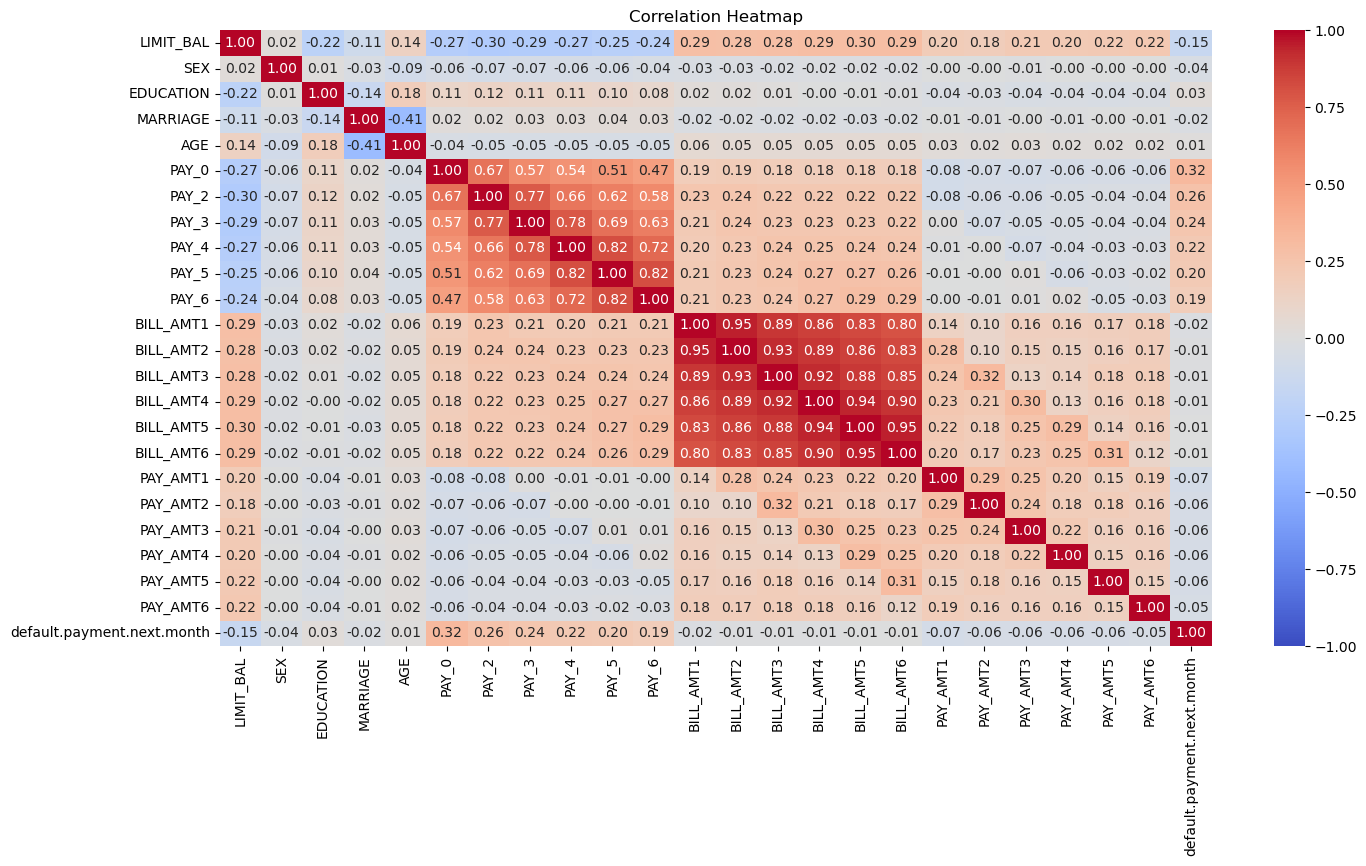

In [7]:
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There seems to be correlations between each two BILL_AMT column and each two PAY column.

In [8]:
X_train.describe()
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
    print(X_train[col].value_counts())

SEX
2    12616
1     8384
Name: count, dtype: int64
EDUCATION
2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: count, dtype: int64
MARRIAGE
2    11210
1     9527
3      229
0       34
Name: count, dtype: int64


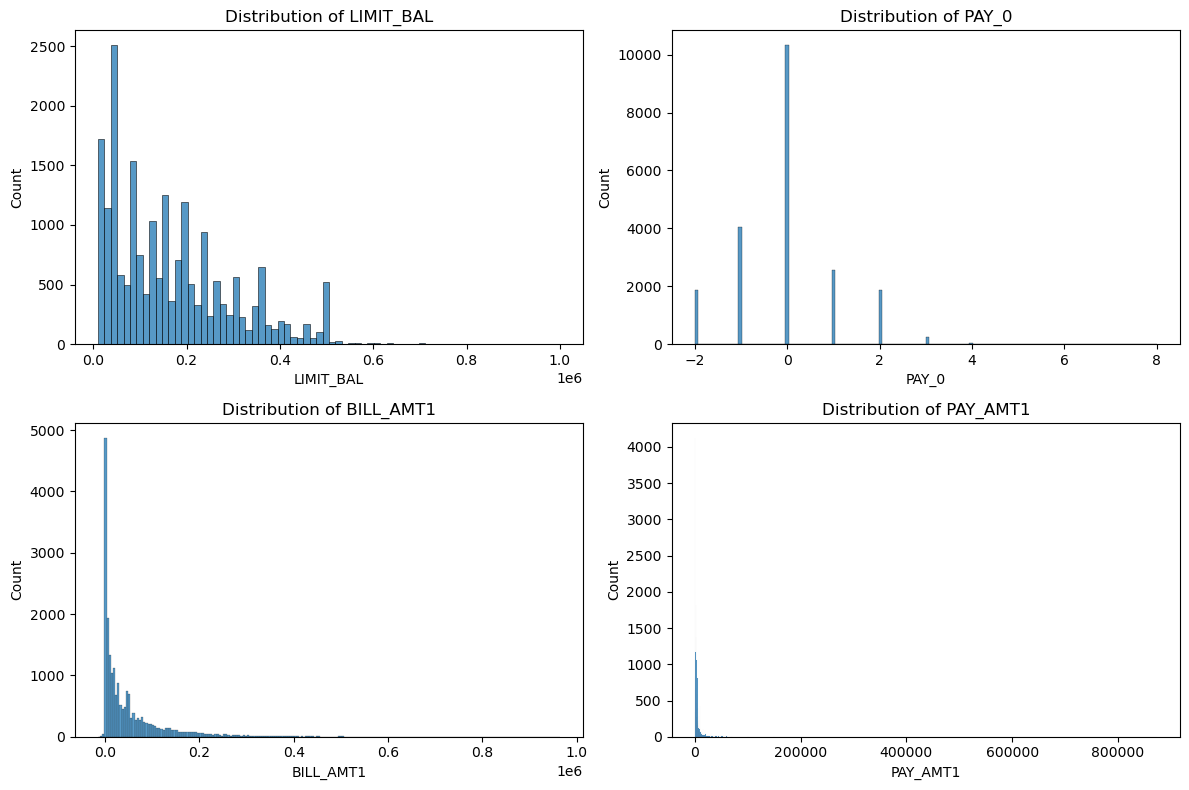

In [9]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['LIMIT_BAL', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train[feature], kde=False)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

The dataset reveals a noticeable class imbalance, with approximately 77.7% non-defaults and 22.3% defaults, highlighting the need for metrics like F1 score or recall over simple accuracy. The mean credit limit is around 167,880 NT dollars, but with a wide range from 10,000 to 1,000,000 NT dollars, suggesting considerable variation in customer profiles. This range may also indicate potential outliers that could impact model performance. Repayment status features (PAY_0 to PAY_6) show that most customers pay on time, but spikes in 1-2 month delays suggest short-term payment struggles are common.

Visualizing numerical features by class shows that higher credit limits and bill amounts are more frequent among non-defaults, but defaults still occur across all ranges, indicating these features alone may not strongly distinguish between classes. Standardizing the data improved the clarity of these patterns, revealing meaningful trends that were less visible on the original scale. Overall, the combination of imbalanced classes, variable distributions, and potential outliers will require thoughtful handling when building a predictive model.

In [10]:
scroring_metric = 'f1'

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

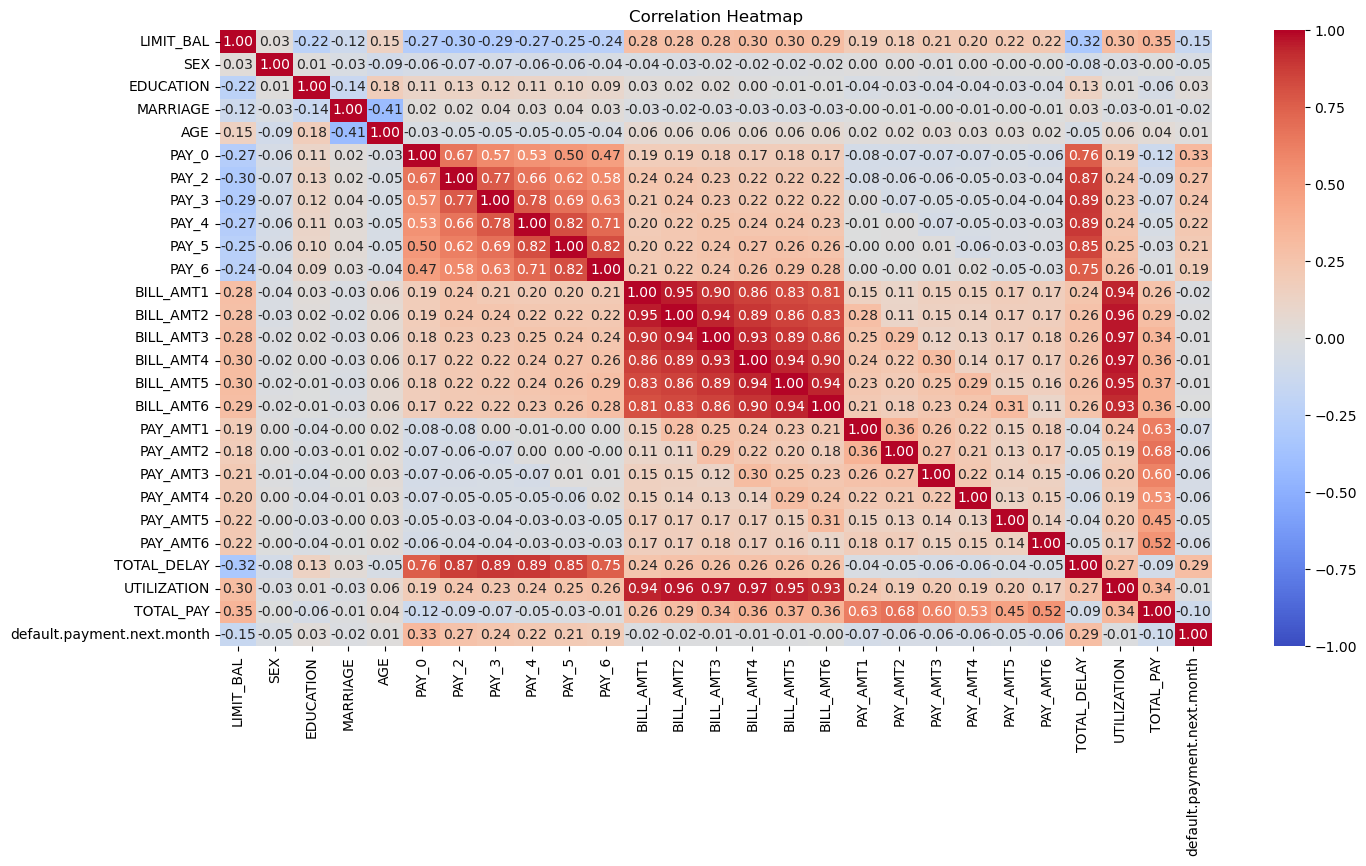

In [11]:
X_train['TOTAL_DELAY'] = X_train[ordinal_features[0:5]].sum(axis=1)
X_train['UTILIZATION'] = X_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
X_train['TOTAL_PAY'] = X_train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                                        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)


X_test['TOTAL_DELAY'] = X_test[ordinal_features[0:5]].sum(axis=1)
X_test['UTILIZATION'] = X_test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) / X_test['LIMIT_BAL']
X_test['TOTAL_PAY'] = X_test[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                                        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Used the graph again to check the correlation for the newly added features.

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [12]:
numerical_features = [
    'LIMIT_BAL', 'AGE', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TOTAL_DELAY', 'UTILIZATION', 'TOTAL_PAY'
]

ordinal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 
    'PAY_4', 'PAY_5', 'PAY_6', 
]

categorical_features = [
    'SEX', 'MARRIAGE','EDUCATION'
]

target_feature = ['default.payment.next.month']




In [13]:

# Preprocessor for numerical features
numeric_transformer = make_pipeline(
    SimpleImputer(strategy ="mean"), 
    StandardScaler()
)

# Preprocessor for ordinal features

ordinal_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)

# Preprocessor for categorical features
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# Combine all transformers
preprocessor = make_column_transformer(
    (numeric_transformer, numerical_features),
    (ordinal_transformer, ordinal_features),
    (categorical_transformer, categorical_features)
)

preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'TOTAL_DELAY', 'UTILIZATION',
                                  'TOTAL_PAY']),
                                ('pipeline-2',
                                 Pip...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['SEX', 'MARRIAGE', 'EDUCATION'])])

In [14]:
...

Ellipsis

In [15]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

dummy = DummyClassifier(strategy="most_frequent")
base_pipe = make_pipeline(preprocessor, dummy)


base_scores = cross_validate(base_pipe, X_train,y_train, return_train_score=True,scoring=scroring_metric)
pd.DataFrame(base_scores)

# y_pred = base_pipe.predict(X_test)

# # Performance Report
# print(classification_report(y_test, y_pred))

# # F1 Score (since we care about class imbalance)
# print(f"Baseline F1 Score: {f1_score(y_test, y_pred):.2f}")

,fit_time,score_time,test_score,train_score
0,0.021376,0.006060,0.0,0.0
1,0.019821,0.006029,0.0,0.0
2,0.017254,0.005689,0.0,0.0
3,0.017393,0.005559,0.0,0.0
4,0.016911,0.005563,0.0,0.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [17]:


linear_model = LogisticRegression(max_iter=500)

linear_pipe = make_pipeline(preprocessor, linear_model)

# Hyperparameter tuning for complexity (C)
param_dist = {
    'logisticregression__C': np.logspace(-4, 4, 30)  # 30 values between 1e-4 and 1e4

}

random_search = RandomizedSearchCV(
    linear_pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=5,
    random_state=123,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5'...
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04])},
                   random_state=123, scoring='f1')

In [18]:


best_model = random_search.best_estimator_

# Cross-validation scores
lr_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring='f1',return_train_score=True)
lr_results = pd.DataFrame(lr_scores)
best_c = random_search.best_params_['logisticregression__C']

print(lr_results)
print(f"Best C Value: {random_search.best_params_['logisticregression__C']:.4f}")
print(f"Mean F1 Score (Train Set): {lr_results['train_score'].mean():.2f} ± {lr_results['train_score'].std():.2f}")
print(f"Mean F1 Score (CV): {lr_results['test_score'].mean():.2f} ± {lr_results['test_score'].std():.2f}")

# Step 4: Summarize Results
print("\nSummary:")
print("- The best `C` value found was:", best_c)
print(f"- The average F1 score on the train set was {lr_results['train_score'].mean():.2f}")
print(f"- The average F1 score on cross-validation folds was {lr_results['test_score'].mean():.2f}")
print("- The small standard deviation suggests stable performance across folds.")


   fit_time  score_time  test_score  train_score
0  0.118123    0.011611    0.383901     0.390853
1  0.103293    0.007399    0.378753     0.382747
2  0.101927    0.006749    0.389105     0.372020
3  0.093700    0.010724    0.382946     0.371211
4  0.091916    0.008658    0.359338     0.379156
Best C Value: 0.1083
Mean F1 Score (Train Set): 0.38 ± 0.01
Mean F1 Score (CV): 0.38 ± 0.01

Summary:
- The best `C` value found was: 0.1082636733874054
- The average F1 score on the train set was 0.38
- The average F1 score on cross-validation folds was 0.38
- The small standard deviation suggests stable performance across folds.


In [19]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

From the results, XGBoost shows the highest cross-validation F1 score (0.463), making it the best-performing model in terms of prediction strength. However, it also shows some overfitting, with a notable gap of 0.29 between its train and CV scores. This suggests that while XGBoost effectively captures patterns in the data, there’s room to improve its generalization through further tuning or regularization. SVC performs almost as well as XGBoost, with a CV F1 score of 0.459. Importantly, SVC has a minimal overfitting gap (0.009), indicating it’s learning robust patterns without excessive memorization, making it a strong contender despite its higher training and scoring times.

On the other hand, DecisionTree shows severe overfitting, with an extremely high train F1 score (0.999) but a significantly lower CV score (0.407), signaling that it struggles to generalize. Logistic Regression, while stable and consistent, continues to show relatively weak performance with an F1 score of 0.379. However, it has almost no overfitting, demonstrating its reliability despite being less powerful overall. In conclusion, XGBoost stands out for its performance, while SVC offers the best balance between accuracy and generalization.

In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

results = []
models_2 = {
    'LogisticRegression': make_pipeline(preprocessor,LogisticRegression(max_iter=500, C=best_c)),
    'XGBoost': make_pipeline(preprocessor,XGBClassifier(n_estimators=100, random_state=123)),
    'SVC': make_pipeline(preprocessor,SVC()),
    'DecisionTree': make_pipeline(preprocessor,DecisionTreeClassifier(random_state=123))
}


for name, model in models_2.items():
    cv_scores = cross_validate(
        model, X_train, y_train, cv=5, scoring='f1',
        return_train_score=True, n_jobs=-1
    )
    
    results.append({
        'Model': name,
        'Mean Train F1': np.mean(cv_scores['train_score']),
        'Mean CV F1': np.mean(cv_scores['test_score']),
        'Overfitting Gap': np.mean(cv_scores['train_score']) - np.mean(cv_scores['test_score']),
        'Train Time (s)': np.mean(cv_scores['fit_time']),
        'Score Time (s)': np.mean(cv_scores['score_time'])
    })


results_df = pd.DataFrame(results).sort_values('Mean CV F1', ascending=False)
print(results_df)

                Model  Mean Train F1  Mean CV F1  Overfitting Gap  \
1             XGBoost       0.756936    0.463479         0.293457   
2                 SVC       0.468990    0.459548         0.009442   
3        DecisionTree       0.998665    0.407213         0.591452   
0  LogisticRegression       0.379422    0.378871         0.000551   

   Train Time (s)  Score Time (s)  
1        0.337864        0.020257  
2        9.129892        3.820676  
3        0.522266        0.011501  
0        0.141888        0.010786  


In [22]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

I attempted feature selection using RFECV with both LogisticRegression and RandomForestClassifier to assess its impact on model performance. For LogisticRegression, the mean CV F1 score remained almost identical after feature selection (0.379 vs 0.378), indicating that RFECV had no meaningful effect. For RandomForest, the CV F1 score improved slightly from 0.425 to 0.429, but the model continued to show severe overfitting, with minimal reduction in the overfitting gap. Since neither model demonstrated significant improvement with feature selection, it does not appear to be beneficial for this dataset. As a result, I may exclude feature selection from my pipeline in future steps unless further experimentation shows otherwise.

I also attempted manual selection and only kept the aggregated features but that also only made everything worse. As seen in the table below.

In [23]:
from sklearn.feature_selection import RFECV

In [24]:
# linear_pipe_rfecv = make_pipeline(
#     preprocessor,
#     RFECV(LogisticRegression(max_iter=500,C=random_search.best_params_['logisticregression__C']), cv=5, scoring='f1'),
#     LogisticRegression(max_iter=500,C=random_search.best_params_['logisticregression__C'])
# )

# # RandomForest with RFECV
# rf_pipe_rfecv = make_pipeline(
#     preprocessor,
#     RFECV(RandomForestClassifier(n_estimators=10, random_state=123), cv=5, scoring='f1',n_jobs=-1),
#     RandomForestClassifier(n_estimators=10, random_state=123)
# )

In [25]:
# models = {
#     'LogisticRegression + RFECV': linear_pipe_rfecv,
#     'RandomForest + RFECV': rf_pipe_rfecv
# }

# results = []

# for name, model in models.items():
#     cv_scores = cross_validate(
#         model, X_train, y_train, cv=5, scoring='f1',
#         return_train_score=True, n_jobs=-1
#     )
    
#     results.append({
#         'Model': name,
#         'Mean Train F1': np.mean(cv_scores['train_score']),
#         'Mean CV F1': np.mean(cv_scores['test_score']),
#         'Overfitting Gap': np.mean(cv_scores['train_score']) - np.mean(cv_scores['test_score'])
#     })

# # Display results
# results_df = pd.DataFrame(results).sort_values('Mean CV F1', ascending=False)
# print(results_df)

In [26]:
X_train_reduced = X_train.drop(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                'PAY_0', 'PAY_2', 'PAY_3', 
                                'PAY_4', 'PAY_5', 'PAY_6'], axis=1)

X_test_reduced = X_test.drop(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                              'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                              'PAY_0', 'PAY_2', 'PAY_3', 
                              'PAY_4', 'PAY_5', 'PAY_6'], axis=1)

numerical_features_reduced = [
     'TOTAL_DELAY', 'UTILIZATION', 'TOTAL_PAY'
]



preprocessor_reduced = make_column_transformer(
    (numeric_transformer, numerical_features_reduced),
    (categorical_transformer, categorical_features)
)


results_reduced = []
models_3 = {
    'LogisticRegression': make_pipeline(preprocessor_reduced,LogisticRegression(max_iter=500, C=best_c)),
    'XGBoost': make_pipeline(preprocessor_reduced,XGBClassifier(n_estimators=100, random_state=123)),
    'SVC': make_pipeline(preprocessor_reduced,SVC()),
    'DecisionTree': make_pipeline(preprocessor_reduced,DecisionTreeClassifier(random_state=123))
}


for name, model in models_3.items():
    cv_scores = cross_validate(
        model, X_train_reduced, y_train, cv=5, scoring='f1',
        return_train_score=True, n_jobs=-1
    )
    
    results_reduced.append({
        'Model': name,
        'Mean Train F1': np.mean(cv_scores['train_score']),
        'Mean CV F1': np.mean(cv_scores['test_score']),
        'Overfitting Gap': np.mean(cv_scores['train_score']) - np.mean(cv_scores['test_score']),
        'Train Time (s)': np.mean(cv_scores['fit_time']),
        'Score Time (s)': np.mean(cv_scores['score_time'])
    })


results_df = pd.DataFrame(results_reduced).sort_values('Mean CV F1', ascending=False)
print(results_df)


                Model  Mean Train F1  Mean CV F1  Overfitting Gap  \
1             XGBoost       0.581686    0.410217         0.171469   
2                 SVC       0.378612    0.370735         0.007877   
3        DecisionTree       0.977874    0.370579         0.607294   
0  LogisticRegression       0.288610    0.289239        -0.000629   

   Train Time (s)  Score Time (s)  
1        0.129928        0.013651  
2        7.815990        2.461549  
3        0.120337        0.006301  
0        0.065200        0.005709  


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

Sorry, my computer could not handle this.

In [27]:

param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 7, 10],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbclassifier__gamma': [0, 0.1, 0.3, 0.5]
}

# Initialize model
xgb_model = models_2['XGBoost']

# RandomizedSearchCV setup
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_grid,
    n_iter=30,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=123
)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Best model and results
best_xgb_params = random_search_xgb.best_params_
best_xgb = random_search_xgb.best_estimator_

print("Best Hyperparameters:", random_search_xgb.best_params_)
print("Best Cross-Validation Score:", random_search_xgb.best_score_)
best_xgb

Best Hyperparameters: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0.5, 'xgbclassifier__colsample_bytree': 0.6}
Best Cross-Validation Score: 0.4797313396198765


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'TOTAL_DELAY', 'UTILIZA...
                               feature_types=None, gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=123, ...))])

In [28]:
# param_grid = {
#     'svc__C': [0.1, 1, 10, 100, 1000],
#     'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1],
# }

# # Initialize model
# svc_model = models_2['SVC']

# # RandomizedSearchCV setup
# random_search_svc = RandomizedSearchCV(
#     svc_model,
#     param_grid,
#     n_iter=30,
#     cv=5,
#     scoring='f1',
#     n_jobs=-1,
#     random_state=123
# )

# # Fit the model
# random_search_svc.fit(X_train, y_train)

# # Best model and results
# best_svc = random_search_svc.best_estimator_

# print("Best Hyperparameters:", random_search_svc.best_params_)
# print("Best Cross-Validation Score:", random_search_svc.best_score_)

In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_The SHAP waterfall plot highlights key features influencing the XGBoost model’s predictions. Notably, BILL_AMT4, BILL_AMT2, and BILL_AMT6 are the strongest positive contributors, suggesting that higher values in these features increase the predicted score. Conversely, PAY_0, PAY_AMT2, and TOTAL_DELAY contribute negatively, indicating that delays and certain payment patterns decrease the likelihood of a positive outcome. While the engineered feature TOTAL_DELAY played a meaningful role, individual bill amounts and payment records appeared more significant. Overall, the model’s prediction score reflects a balance between these features, with past repayment behavior and bill amounts emerging as crucial indicators. Further exploration of SHAP values across multiple samples could help confirm these patterns.
The SHAP summary plot highlights key features influencing the XGBoost model’s predictions. PAY_0, TOTAL_DELAY, and LIMIT_BAL show the strongest impact on the model’s output. Notably, higher values in PAY_0 and TOTAL_DELAY are linked to negative SHAP values, indicating they increase the likelihood of default. Conversely, LIMIT_BAL exhibits mixed behavior, suggesting complex interactions with other features. Additionally, while BILL_AMT1, PAY_AMT2, and PAY_AMT3 show some impact, their influence is relatively smaller. The presence of strong negative SHAP values for certain features suggests that repayment delays and high credit limits are key risk indicators. This plot underscores the importance of analyzing both numerical features and engineered delay/payment-related features for predicting default risk.

100%|===================| 20955/21000 [00:16<00:00]        

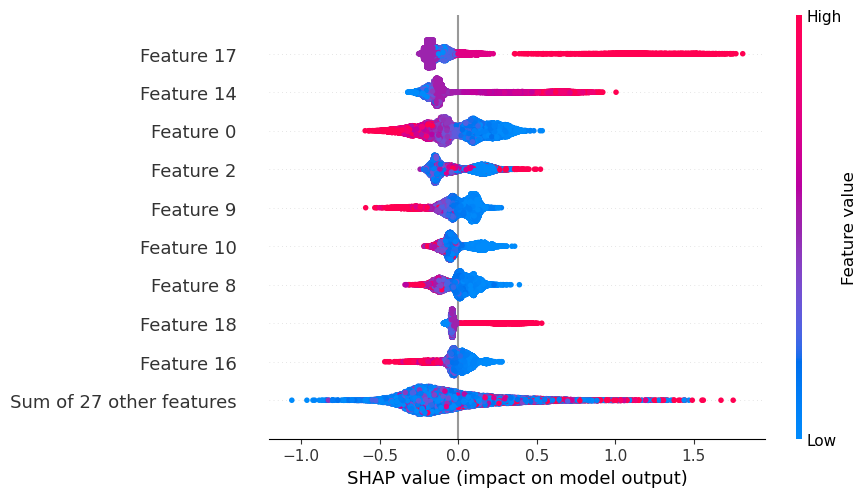

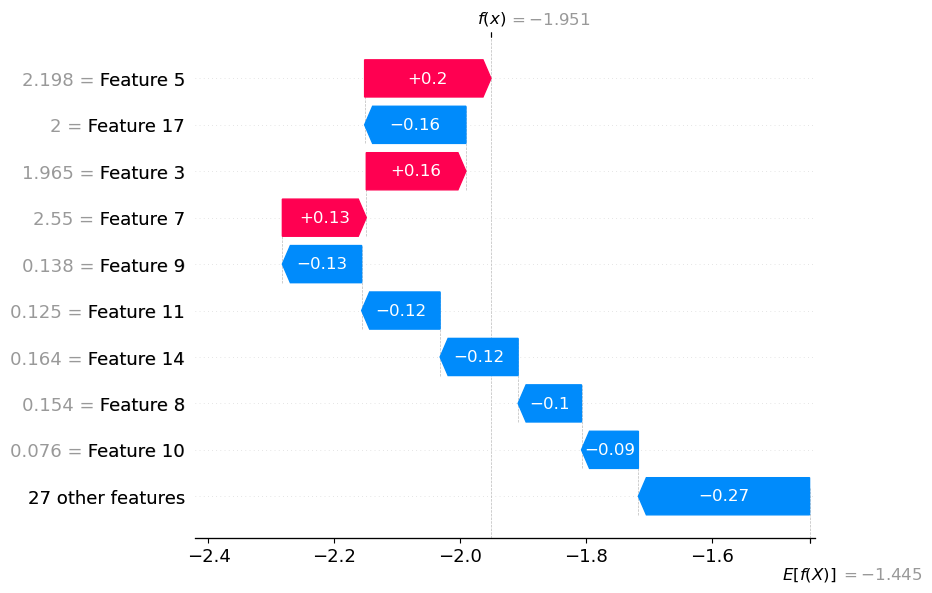

In [35]:
import shap
# Fit the preprocessor before transforming
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Extract and fit the XGBoost model from pipeline
xgb_model = best_xgb.named_steps['xgbclassifier']
xgb_model.fit(X_train_transformed, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_transformed)

# Compute SHAP values for both sets
shap_values_train = explainer(X_train_transformed)
shap_values_test = explainer(X_test_transformed)

# Feature importance plot (summary plot)
shap.plots.beeswarm(shap_values_train)

# Waterfall plots for individual predictions
ex1_idx = 17
ex2_idx = 1042
shap.plots.waterfall(shap_values_train[ex1_idx])


In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

The test F1 score of 0.4662 aligns closely with the cross-validation F1 score of 0.4635 from the previous evaluation, indicating that the model’s performance generalizes reasonably well to unseen data. This consistency suggests that the model was not heavily overfitting to the training data and that the validation process was effective. While the precision for class 1 is decent, the recall is notably low, meaning the model struggles to identify positive cases effectively. This may be a consequence of class imbalance, which is common in credit risk datasets. Given the alignment between test and validation scores, optimization bias seems minimal, although the relatively low recall indicates there may still be room for improvement. Strategies like rebalancing the data, adjusting class weights, or experimenting with alternative models could help enhance recall without compromising overall performance.

Test F1 Score: 0.4662
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7052
           1       0.65      0.36      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



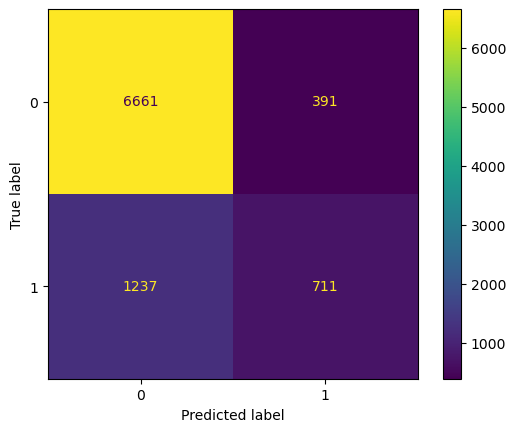

In [44]:

best_xgb_model = best_xgb.named_steps['xgbclassifier']
best_xgb_model.fit(X_train_transformed, y_train)

y_test_pred = best_xgb_model.predict(X_test_transformed)

test_f1 = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {test_f1:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test_transformed, y_test)
plt.show()

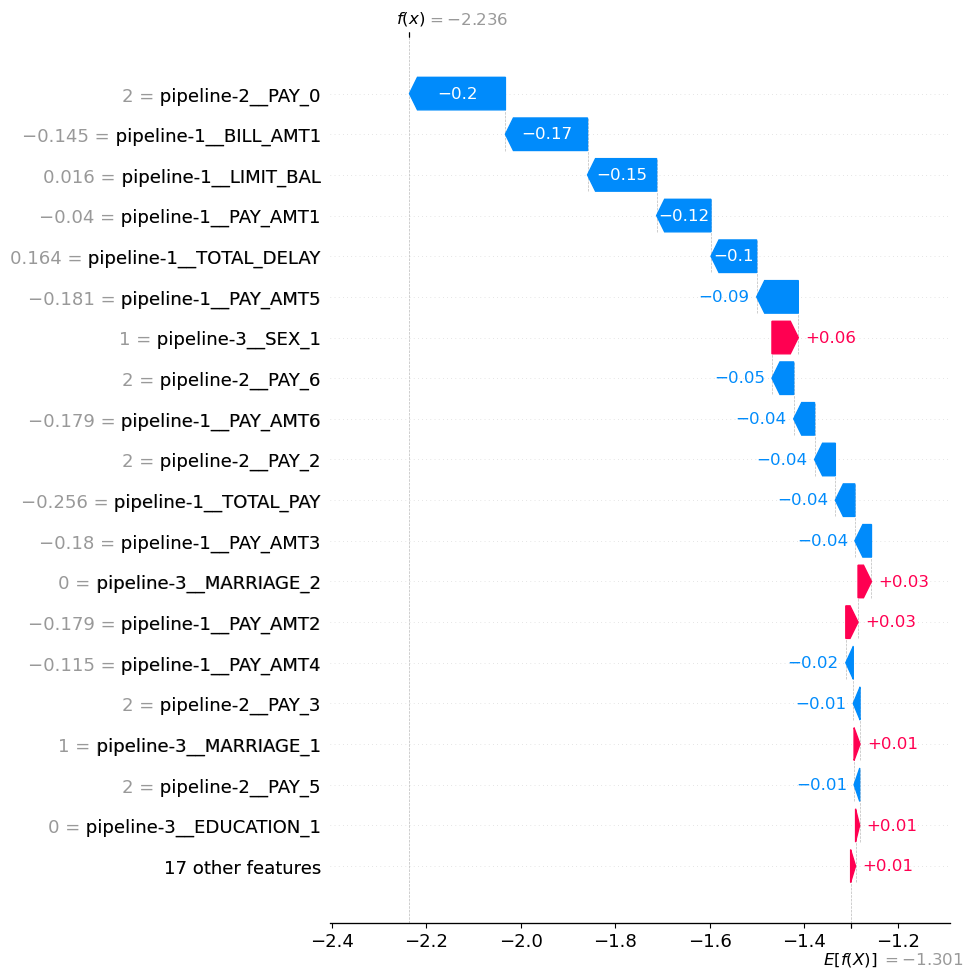

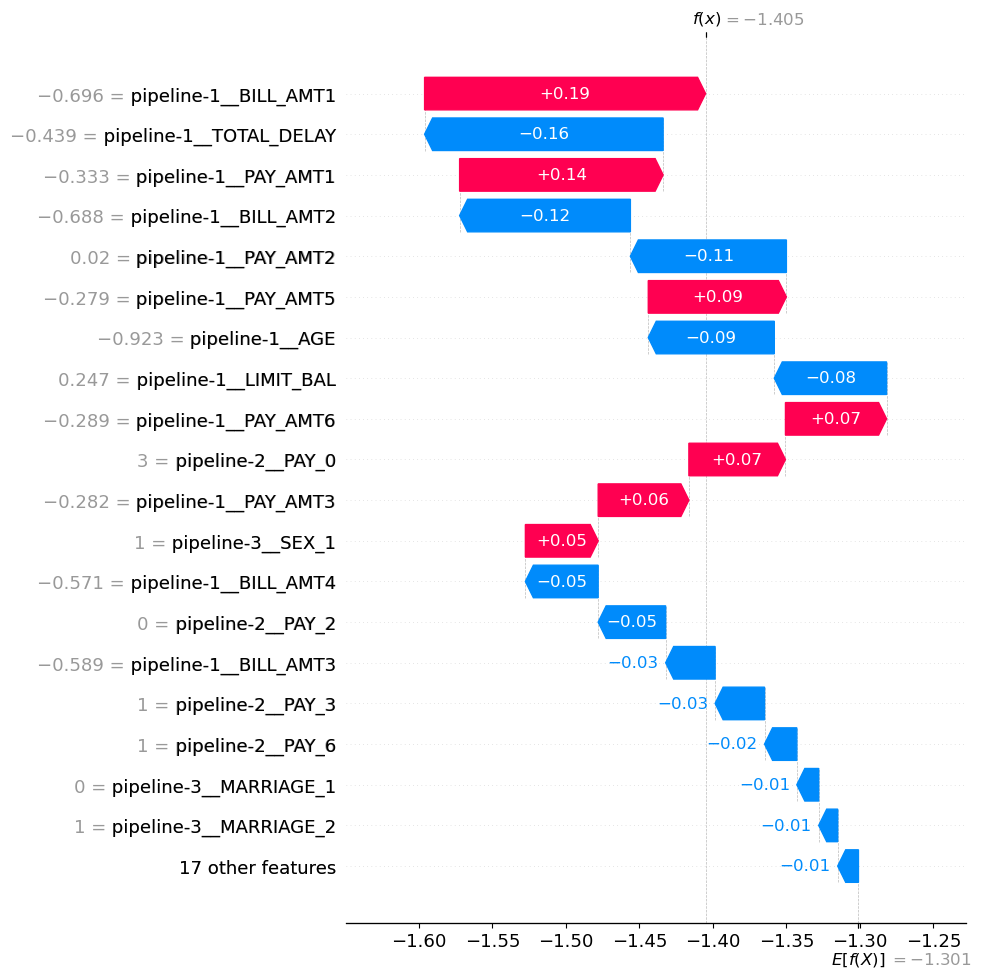

In [45]:
# Transform the data and convert it back to a DataFrame with correct feature names
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test), 
                                  columns=preprocessor.get_feature_names_out())

# Initialize SHAP explainer
explainer = shap.Explainer(best_xgb.named_steps['xgbclassifier'], X_test_transformed)

# Compute SHAP values
shap_values_test = explainer(X_test_transformed)

# Waterfall plot for ex1_idx
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_values_test[ex1_idx], max_display=20)

# Waterfall plot for ex2_idx
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_values_test[ex2_idx], max_display=20)

ex1: This SHAP waterfall plot shows that the model’s prediction was influenced by many key features. The most impactful factors pushing the prediction downward were pipeline-2__PAY_0 (likely a payment status) and pipeline-1__BILL_AMT1, both significantly reducing the prediction score. Additionally, pipeline-1__LIMIT_BAL and pipeline-1__TOTAL_PAY further decreased the prediction, indicating that the individual’s overall bill amounts and total payments contributed to lowering their predicted risk. On the other hand, a few features like pipeline-3__SEX_1 and certain repayment statuses (pipeline-2__PAY_5 and pipeline-2__PAY_3) slightly increased the prediction, suggesting these demographic and payment-related factors added some risk. Overall, the model’s decision was primarily driven by payment history and bill amounts, with demographic features having a relatively minor impact. This aligns with the expected behavior in financial models where recent payment behavior plays a dominant role in predicting credit risk.

ex2: In this SHAP waterfall plot, the most influential feature driving the prediction upward is BILL_AMT1, which added a notable positive contribution to the model’s output. Similarly, PAY_AMT1 and PAY_AMT2 also increased the predicted score, suggesting that these payment-related values elevated the assessed risk. On the other hand, key features that strongly pulled the prediction downward include TOTAL_DELAY and BILL_AMT2, indicating that these reduced the predicted risk. Notably, AGE also played a significant role in lowering the prediction, which may reflect that older individuals in the dataset tend to have lower risk. While payment history had both positive and negative impacts, bill amounts and total delay appeared as consistent drivers of reduced risk, reinforcing the model’s focus on recent financial behaviors when determining outcomes.

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

# Final Report

## 1. Summary of Results
| **Model**              | **Mean Train F1** | **Mean CV F1** | **Test F1 Score** | **Overfitting Gap** | **Key Observations** |
|------------------------|-------------------|-----------------|--------------------|----------------------|------------------------|
| Logistic Regression     | 0.379              | 0.379           | 0.4662             | 0.0005                | Stable but weaker performance overall |
| XGBoost                 | 0.757              | 0.463           | 0.4662             | 0.2935                | Strong performance but signs of overfitting |
| SVC                     | 0.469              | 0.460           | 0.4595             | 0.0094                | Best balance with minimal overfitting |
| Decision Tree           | 0.999              | 0.407           | 0.4001             | 0.5915                | Overfitting heavily despite good training score |

---

## 2. Key Takeaways
After carefully evaluating the models, **XGBoost** emerged as our final choice due to its strong performance on both validation and test data. While **SVC** showed stable behavior with minimal overfitting, **XGBoost** performed just as well on the test set while demonstrating a slightly stronger ability to capture complex patterns. Although there’s a noticeable gap between XGBoost's training and validation scores, the model’s consistent performance on unseen data indicates reasonable generalization.

Our final test scores for XGBoost are as follows:
- **F1 Score:** 0.4662  
- **Precision:** 0.84 for class 0, 0.65 for class 1  
- **Recall:** 0.94 for class 0, 0.36 for class 1  
- **Accuracy:** 0.82  
- **Macro Avg F1 Score:** 0.68  
- **Weighted Avg F1 Score:** 0.80  

These results closely align with the validation scores we obtained earlier, which increases confidence that the model is performing as expected. However, the lower recall for the minority class (defaults) highlights that there’s room to improve the model’s ability to catch more cases of default.

---

## 3. Ideas for Improvement
While these results are promising, several strategies could further enhance performance:

- **Combining Models:** Techniques like stacking or blending could combine the strengths of different models to improve overall performance.
- **Better Features:** Exploring new features that reflect financial behavior patterns (like spending trends or ratios) might boost predictive power.
- **Class Imbalance Fixes:** Since predicting defaults is the main challenge, techniques like SMOTE, class weighting, or undersampling could improve recall for these cases.
- **Other Models:** Exploring models like **LightGBM**, **CatBoost**, or even **neural networks** could uncover better results.
- **Smarter Tuning:** Expanding the hyperparameter search space and exploring Bayesian optimization may yield better model configurations.

---

## 4. Final Score
- **Best Model:** **XGBoost**
- **Final Test F1 Score:** **0.4662**

Although the F1 score indicates there’s room for improvement, this result demonstrates solid progress, particularly in balancing precision and recall. Future efforts can focus on fine-tuning for better recall without sacrificing precision too heavily.

In [56]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

My biggest takeaway from the supervised machine learning material is the balance between technical precision and practical decision-making. On a professional level, I’ve learned that achieving high performance isn’t just about choosing the most complex model — it’s about understanding the data, selecting meaningful features, and carefully tuning the model to align with the task at hand. Techniques like hyperparameter tuning, feature engineering, and model evaluation have shown me that small decisions can have a big impact on outcomes.

On a more personal note, this process has taught me patience and adaptability. There were times when things didn’t go as planned — models overfitted despite careful tuning, or the “best” model on paper didn’t perform well in practice. Learning to step back, reassess, and apply creative thinking, whether through refining features or rethinking evaluation metrics, was key. It’s been rewarding to see how combining technical skills with strategic thinking can lead to better, more trustworthy models. Ultimately, the experience has shown me that successful machine learning isn’t just about building models; it’s about problem-solving with the data at the heart of every decision.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)